## Neuronal Networks

In this exercise we use keras with theano backend in order to construct our first neuronal network. As a toy problem we use the classical Pima Indian Diabetes dataset. The example is based on [this introduction](https://github.com/dashee87/blogScripts/blob/master/Jupyter/2017-09-06-another-keras-tutorial-for-neural-network-beginners.ipynb)

In [22]:
import numpy as np
import pandas as pd
import seaborn as sns
import os
import matplotlib.pyplot as plt
import time
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping

In [2]:
dataset = pd.read_csv("datasets/diabetes.csv", header=None).values
diabetesPD = pd.DataFrame(dataset[1:], columns=dataset[0])
diabetesPD.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## Explore Data Set

In [3]:
diabetesPD.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768,768,768,768,768,768,768,768,768
unique,17,136,47,51,186,248,517,52,2
top,1,99,70,0,0,32,0.258,22,0
freq,135,17,57,227,374,13,6,72,500


In [4]:
diabetesPD.isnull().any()

Pregnancies                 False
Glucose                     False
BloodPressure               False
SkinThickness               False
Insulin                     False
BMI                         False
DiabetesPedigreeFunction    False
Age                         False
Outcome                     False
dtype: bool

In [5]:
diabetesPD.dtypes

Pregnancies                 object
Glucose                     object
BloodPressure               object
SkinThickness               object
Insulin                     object
BMI                         object
DiabetesPedigreeFunction    object
Age                         object
Outcome                     object
dtype: object

In [6]:
diabetesPD = diabetesPD.apply(pd.to_numeric, errors='ignore')

In [7]:
diabetesPD.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [8]:
diabetesPD['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

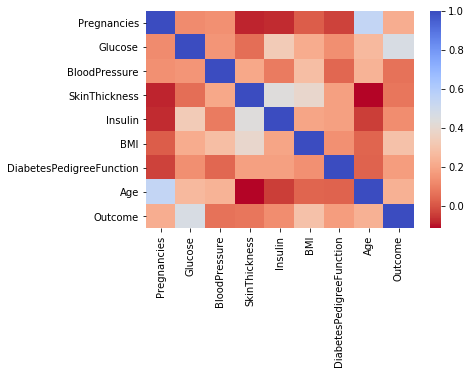

In [9]:
corr_mat = diabetesPD.corr()
sns.heatmap(corr_mat, cmap='coolwarm_r', annot_kws={'size':20})
plt.show()

/Users/marcel/anaconda3/envs/ML_Setup/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/marcel/anaconda3/envs/ML_Setup/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


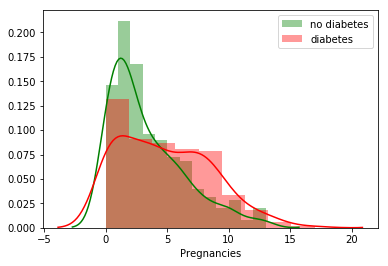

In [10]:
sns.distplot(diabetesPD['Pregnancies'][diabetesPD['Outcome']==0],color='g',label='no diabetes')
sns.distplot(diabetesPD['Pregnancies'][diabetesPD['Outcome']==1],color='r',label='diabetes')
plt.legend()
plt.show()

## Split a test set BEFORE doing anything!

#### Excursion: Splitting the data

In [11]:
X = diabetesPD.drop('Outcome', axis = 1)
Y = diabetesPD.Outcome

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)
print(X_train.shape)
print(X_test.shape)

(614, 8)
(154, 8)


### Scaling the data

In [12]:
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [13]:
my_first_nn = Sequential() 
my_first_nn.add(Dense(5, input_dim=8, activation='relu')) 
my_first_nn.add(Dense(1, activation='sigmoid'))
my_first_nn.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [14]:
my_first_nn_fitted = my_first_nn.fit(scaler.transform(X_train), Y_train, epochs=250, batch_size=X_train.shape[0], verbose=1, initial_epoch=0)

Epoch 1/250
614/614 [==============================] - 0s 328us/step - loss: 0.7024 - acc: 0.6075
Epoch 2/250
614/614 [==============================] - 0s 3us/step - loss: 0.7010 - acc: 0.6124
Epoch 3/250
614/614 [==============================] - 0s 3us/step - loss: 0.6997 - acc: 0.6156
Epoch 4/250
614/614 [==============================] - 0s 2us/step - loss: 0.6983 - acc: 0.6140
Epoch 5/250
614/614 [==============================] - 0s 2us/step - loss: 0.6969 - acc: 0.6189
Epoch 6/250
614/614 [==============================] - 0s 2us/step - loss: 0.6956 - acc: 0.6189
Epoch 7/250
614/614 [==============================] - 0s 3us/step - loss: 0.6943 - acc: 0.6189
Epoch 8/250
614/614 [==============================] - 0s 2us/step - loss: 0.6929 - acc: 0.6173
Epoch 9/250
614/614 [==============================] - 0s 2us/step - loss: 0.6916 - acc: 0.6156
Epoch 10/250
614/614 [==============================] - 0s 2us/step - loss: 0.6903 - acc: 0.6173
Epoch 11/250
614/614 [===============

In [15]:
my_first_nn.evaluate(scaler.transform(X_test), Y_test, verbose=0)

[0.5033793402956678, 0.7922077891114471]

In [16]:
print(classification_report(Y_test, my_first_nn.predict_classes(scaler.transform(X_test))))

             precision    recall  f1-score   support

          0       0.83      0.88      0.85       107
          1       0.68      0.60      0.64        47

avg / total       0.79      0.79      0.79       154



### Q1: Is this a good result? How do we evaluate this?
### Q2: Is this a valid approach? Where are the problems?¶

# A more structured approach

## 1) Stopping the training at the "correct" time

##### Train ALL the epochs !!!

In [17]:
my_second_nn = Sequential() 
my_second_nn.add(Dense(5, input_dim=8, activation='relu')) 
my_second_nn.add(Dense(1, activation='sigmoid'))
my_second_nn.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

my_second_nn_fitted = my_second_nn.fit(scaler.transform(X_train), Y_train, epochs=5000, batch_size=X_train.shape[0],
                                       validation_split=0.2, verbose=0, initial_epoch=0)
my_second_nn.evaluate(scaler.transform(X_test), Y_test, verbose=0)

[0.45557493513280695, 0.8116883093660529]

In [18]:
print(classification_report(Y_test, my_second_nn.predict_classes(scaler.transform(X_test))))

             precision    recall  f1-score   support

          0       0.84      0.90      0.87       107
          1       0.72      0.62      0.67        47

avg / total       0.81      0.81      0.81       154



### Q: What is happening?

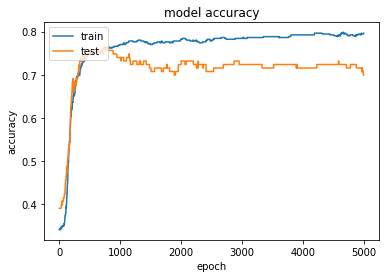

In [19]:
plt.plot(my_second_nn_fitted.history['acc'])
plt.plot(my_second_nn_fitted.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

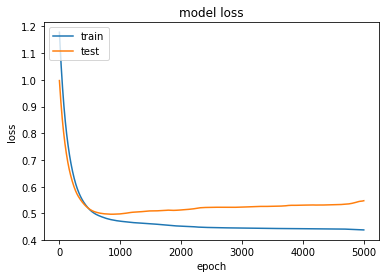

In [20]:
plt.plot(my_second_nn_fitted.history['loss'])
plt.plot(my_second_nn_fitted.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

#### Excursion: Overfitting

##### Setting a Callback for early stopping 

In [23]:
early_stop_crit = EarlyStopping(monitor='val_loss', min_delta=0, patience=25, verbose=1, mode='auto')

In [24]:
my_third_nn = Sequential() 
my_third_nn.add(Dense(5, input_dim=8, activation='relu')) 
my_third_nn.add(Dense(1, activation='sigmoid'))
my_third_nn.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

my_third_nn_fitted = my_third_nn.fit(scaler.transform(X_train), Y_train, epochs=5000, batch_size=X_train.shape[0],
                                          validation_split=0.2, verbose=0, initial_epoch=0,
                                          callbacks=[early_stop_crit])

Epoch 00386: early stopping


In [25]:
my_third_nn.evaluate(scaler.transform(X_test), Y_test, verbose=0)

[0.4392833570381264, 0.8246753223530658]

In [26]:
print(classification_report(Y_test, my_third_nn.predict_classes(scaler.transform(X_test))))

             precision    recall  f1-score   support

          0       0.83      0.94      0.88       107
          1       0.81      0.55      0.66        47

avg / total       0.82      0.82      0.81       154



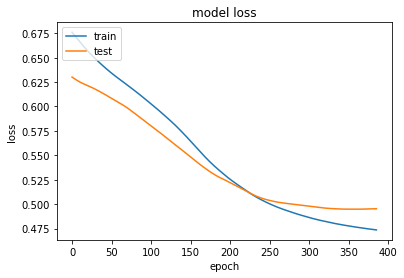

In [27]:
plt.plot(my_third_nn_fitted.history['loss'])
plt.plot(my_third_nn_fitted.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

##### A helpful set up

In [28]:
def runNeuroNet(X_train, Y_train, X_test, Y_test, n_neurons, n_epochs, v_split, early_stopping=None):
    nn_model = Sequential() 
    nn_model.add(Dense(n_neurons, input_dim=8, activation='relu')) # hidden layer
    nn_model.add(Dense(1, activation='sigmoid')) # output layer
    nn_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

    model_callbacks = []
    if early_stopping is not None:
        model_callbacks = [early_stopping]
    
    output = nn_model.fit(X_train, Y_train, epochs=n_epochs, verbose=0, 
                              batch_size=X_train.shape[0], callbacks=model_callbacks, 
                              initial_epoch=0, validation_split=v_split).history
    test_scores = nn_model.evaluate(X_test, Y_test, verbose=0)
    output['test_loss'] = test_scores[0]
    output['test_acc'] = test_scores[1]
    return output

## 2) The "correct" number of neurons

###### Take ALL the neurons!!!

In [29]:
moreNeurons_nn_fitted = runNeuroNet(scaler.transform(X_train), Y_train, scaler.transform(X_test), Y_test, 1000, 500, 0.2)

In [30]:
moreNeurons_nn_fitted['test_acc']

0.8051948067429778

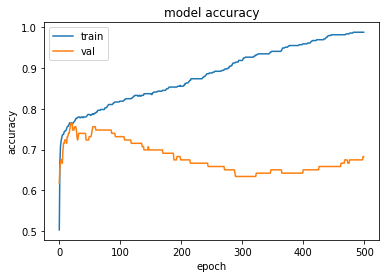

In [31]:
plt.plot(moreNeurons_nn_fitted['acc'])
plt.plot(moreNeurons_nn_fitted['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val', 'test'], loc='upper left')
plt.show()

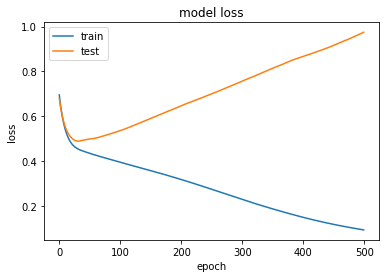

In [32]:
plt.plot(moreNeurons_nn_fitted['loss'])
plt.plot(moreNeurons_nn_fitted['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### Q: What is happening?

###### Use early stopping

In [33]:
moreNeurons_nn_fitted = runNeuroNet(scaler.transform(X_train), Y_train, scaler.transform(X_test), Y_test, 1000, 500, 0.2, early_stop_crit)

Epoch 00059: early stopping


In [34]:
moreNeurons_nn_fitted['test_acc']

0.844155846478103

## Hyperparameter: Find the "correct" number of neurons

##### Grid Search

In [36]:
my_grid=[1,5,10,15,20,25,30,35,40,45,50]
nn_accuracies = []
nn_accuracies_early = []
nn_losses = []
nn_losses_early = []
early_stop_crit = EarlyStopping(monitor='val_loss', min_delta=0, patience=20, verbose=1, mode='auto')
for i in my_grid:
    print(i)
    
    nn_output = runNeuroNet(scaler.transform(X_train), Y_train, scaler.transform(X_test), Y_test, i, 1000, 0.2)
    nn_output_early = runNeuroNet(scaler.transform(X_train), Y_train, scaler.transform(X_test), Y_test, i, 1000, 0.2, early_stop_crit)
    
    nn_accuracies.append([i, nn_output['acc'][-1], nn_output['val_acc'][-1], nn_output['test_acc']])
    nn_accuracies_early.append([i, nn_output_early['acc'][-1], nn_output_early['val_acc'][-1], nn_output_early['test_acc']])
    nn_losses.append([i, nn_output['loss'][-1], nn_output['val_loss'][-1], nn_output['test_loss']])
    nn_losses_early.append([i, nn_output_early['loss'][-1], nn_output_early['val_loss'][-1], nn_output_early['test_loss']])

1
5
Epoch 00925: early stopping
10
Epoch 00336: early stopping
15
Epoch 00292: early stopping
20
Epoch 00199: early stopping
25
Epoch 00264: early stopping
30
Epoch 00180: early stopping
35
Epoch 00207: early stopping
40
Epoch 00219: early stopping
45
Epoch 00211: early stopping
50
Epoch 00163: early stopping


In [37]:
nn_accuracies = np.array(nn_accuracies)
nn_accuracies_early = np.array(nn_accuracies_early)
nn_losses = np.array(nn_losses)
nn_losses_early = np.array(nn_losses_early)

In [38]:
print(nn_losses)

[[ 1.          0.51093137  0.56086814  0.46520648]
 [ 5.          0.43853092  0.49625269  0.42147028]
 [10.          0.42625695  0.54096735  0.40252569]
 [15.          0.41009676  0.50088042  0.41589546]
 [20.          0.37649295  0.59210271  0.40617258]
 [25.          0.36000657  0.65508854  0.38421399]
 [30.          0.36013427  0.58076084  0.41128261]
 [35.          0.34132862  0.61974823  0.43288007]
 [40.          0.32073569  0.66238892  0.40081104]
 [45.          0.34947473  0.64390093  0.39945401]
 [50.          0.30882961  0.61582637  0.41307104]]


In [39]:
print(nn_losses_early)

[[ 1.          0.49910045  0.56028068  0.44590174]
 [ 5.          0.45714772  0.50995052  0.42702983]
 [10.          0.45314056  0.51215416  0.41427501]
 [15.          0.46273541  0.51794827  0.41982197]
 [20.          0.45963237  0.50845724  0.435144  ]
 [25.          0.44583535  0.52607286  0.43912917]
 [30.          0.46040687  0.49182543  0.45791591]
 [35.          0.45686755  0.48698428  0.42425106]
 [40.          0.44689167  0.49391454  0.41111858]
 [45.          0.44142917  0.49331427  0.41365625]
 [50.          0.44401908  0.48920971  0.41795078]]


### Q: Do we trust these results?

##### Cross Validation

In [ ]:
kfold = StratifiedKFold(n_splits=5, shuffle=True)
all_kfold_results=[]
for grid_val in my_grid:
    kfold_results = []
    print(grid_val)
    for train_set, valid_set in kfold.split(X_train, Y_train):
        x_train_temp = X_train.iloc[train_set,:]
        sc_temp = StandardScaler()
        sc_temp.fit(x_train_temp)
        temp_result = runNeuroNet(sc_temp.transform(x_train_temp), Y_train.iloc[train_set], 
                                  sc_temp.transform(X_train.iloc[valid_set,:]), Y_train.iloc[valid_set],
                                  grid_val, 1000,  0.2, early_stop_crit)
        kfold_results.append(temp_result['test_loss'])
    all_kfold_results.append(kfold_results)
    

In [ ]:
all_kfold_results


In [ ]:
np.mean(all_kfold_results,axis=1)

In [ ]:
idx = np.argmin(np.mean(all_kfold_results,axis=1))
print("The optimal number of neurons is: ", my_grid[idx])

### Q: Do we trust these results?

##### Even more cross validation

In [ ]:
rkf = RepeatedStratifiedKFold(n_splits=5, n_repeats=3)
all_rkfold_results = []
for grid_val in my_grid:
    rkfold_results = []
    print(grid_val)
    for train_set, valid_set in rkf.split(X_train, Y_train):
        x_train_temp = X_train.iloc[train_set,:]
        sc_temp = StandardScaler()
        sc_temp.fit(x_train_temp)
        temp_result = runNeuroNet(sc_temp.transform(x_train_temp), Y_train.iloc[train_set], 
                                  sc_temp.transform(X_train.iloc[valid_set,:]), Y_train.iloc[valid_set],
                                  grid_val, 1000,  0.2, early_stop_crit)
        rkfold_results.append(temp_result['test_loss'])
    all_rkfold_results.append(rkfold_results)

In [ ]:
idx = np.argmin(np.mean(all_rkfold_results,axis=1))
print("The optimal number of neurons is: ", my_grid[idx])

## The "optimal" model

In [40]:
my_optimal_nn = Sequential() 
my_optimal_nn.add(Dense(40, input_dim=8, activation='relu')) 
my_optimal_nn.add(Dense(1, activation='sigmoid'))
my_optimal_nn.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

my_optimal_nn_fitted = my_optimal_nn.fit(scaler.transform(X_train), Y_train, epochs=5000, batch_size=X_train.shape[0],
                                          validation_split=0.1, verbose=1, initial_epoch=0,
                                          callbacks=[early_stop_crit])
my_optimal_nn.evaluate(scaler.transform(X_test), Y_test, verbose=0)

Train on 552 samples, validate on 62 samples
Epoch 1/5000
552/552 [==============================] - 1s 1ms/step - loss: 0.6372 - acc: 0.6775 - val_loss: 0.6636 - val_acc: 0.6452
Epoch 2/5000
552/552 [==============================] - 0s 5us/step - loss: 0.6323 - acc: 0.6721 - val_loss: 0.6603 - val_acc: 0.6613
Epoch 3/5000
552/552 [==============================] - 0s 6us/step - loss: 0.6275 - acc: 0.6739 - val_loss: 0.6571 - val_acc: 0.6613
Epoch 4/5000
552/552 [==============================] - 0s 7us/step - loss: 0.6228 - acc: 0.6812 - val_loss: 0.6540 - val_acc: 0.6613
Epoch 5/5000
552/552 [==============================] - 0s 7us/step - loss: 0.6183 - acc: 0.6866 - val_loss: 0.6510 - val_acc: 0.6452
Epoch 6/5000
552/552 [==============================] - 0s 6us/step - loss: 0.6139 - acc: 0.6866 - val_loss: 0.6480 - val_acc: 0.6290
Epoch 7/5000
552/552 [==============================] - 0s 5us/step - loss: 0.6096 - acc: 0.6830 - val_loss: 0.6452 - val_acc: 0.6290
Epoch 8/5000
552/

[0.41637612859924117, 0.8246753269975836]

In [41]:
Y_pred = my_optimal_nn.predict_classes(scaler.transform(X_test))

In [42]:
print(classification_report(Y_test, Y_pred))

             precision    recall  f1-score   support

          0       0.86      0.90      0.88       107
          1       0.74      0.66      0.70        47

avg / total       0.82      0.82      0.82       154



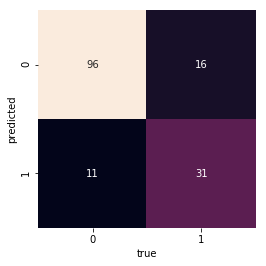

In [43]:
mat = confusion_matrix(Y_test, Y_pred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true')
plt.ylabel('predicted');
plt.show()

In [44]:
my_optimal_nn.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_55 (Dense)             (None, 40)                360       
_________________________________________________________________
dense_56 (Dense)             (None, 1)                 41        
Total params: 401
Trainable params: 401
Non-trainable params: 0
_________________________________________________________________
